# Geographical Visualization

## Objectives
- Understand basics of geopandas DataFrame
- Learn how to draw detailed maps of the US with color gradations

## Special Thanks to Tim Mango
- [His Medium post](https://medium.com/@tmango/plotting-geojson-files-with-matplotlib-5ed87df570ab)
- [His final project repo](https://github.com/TimMango/.Project-DSFellowship_Final_Project)

## Examples
- [My blog post on US 2016 Presidential Election](https://medium.com/keita-starts-data-science/the-divided-states-of-america-f42e904e76f0?source=friends_link&sk=944e362e7e7e00df349f56b1dfe53431)

## Required Data
- cbg.geojson from https://docs.safegraph.com/docs/open-census-data
- for this workbook, a smaller subset for DC, Maryland, and Virginia is provided
- the subset is still 150MB file (50MB after compressing)! The entire US geojson file comes larger than 3GB

In [53]:
import descartes
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile

#### Let's read the file with geopandas! 
[Geopandas Documentation](http://geopandas.org/)

In [56]:
zf = zipfile.ZipFile("data/dmv.geojson.zip")
dmv_gdf = gpd.read_file(zf.open("dmv.geojson"))

In [59]:
type(dmv_gdf)

geopandas.geodataframe.GeoDataFrame

In [58]:
dmv_gdf.head()

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,11,001,000702,2,110010007022,DC,District of Columbia,H6,(POLYGON ((-77.07705800012656 38.9254210001790...
1,11,001,000701,2,110010007012,DC,District of Columbia,H6,(POLYGON ((-77.08038999999849 38.9301960000454...
2,11,001,001302,3,110010013023,DC,District of Columbia,H6,(POLYGON ((-77.06292100020397 38.9431539995574...
3,11,001,005500,4,110010055004,DC,District of Columbia,H6,(POLYGON ((-77.04879800002766 38.9077510001086...
4,11,001,005500,5,110010055005,DC,District of Columbia,H6,(POLYGON ((-77.04663500010514 38.9079019998774...


In [60]:
dmv_gdf.shape

(9708, 9)

#### DMV has almost 10,000 blocks! Each county is broken down to blocks and the column "CensusBlockGroup" consists of numbers from columns "StateFIPS", "CountyFIPS", "TractCode", and "BlockGroup". The entire US map has more than 200,000 rows and the file is very heavy.

#### Now, let's try visualization!

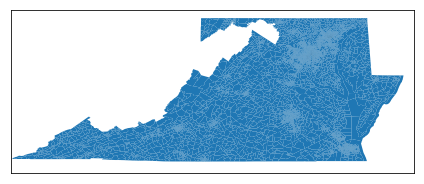

In [62]:
ax = dmv_gdf.plot()
ax.set_xlim([-83.7, -74.75])
ax.set_ylim([36.28, 39.9])
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.show()

#### We set xlim and ylim at the longitude and latitude ranges. Each of 9,708 the polygons are plotted. In many cases, it would be easier to see maps without the sea and rivers. So let's drop polygons representing water.

In [63]:
dmv_gdf = dmv_gdf.loc[dmv_gdf.BlockGroup!="0"]

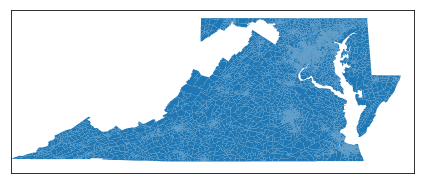

In [64]:
ax = dmv_gdf.plot()
ax.set_xlim([-83.7, -74.75])
ax.set_ylim([36.28, 39.9])
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.show()

#### This is much better! Now let's try color coding.

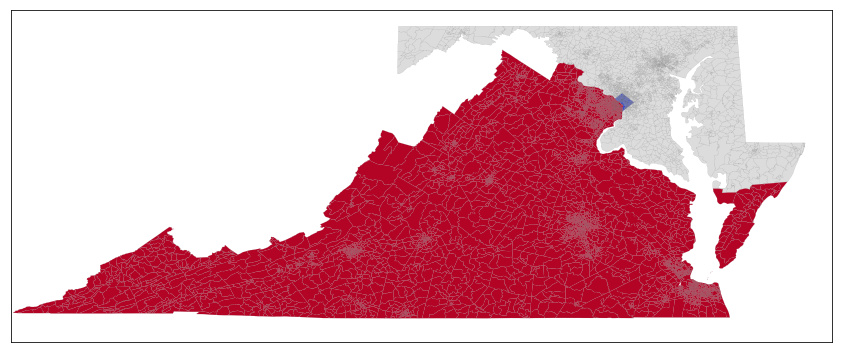

In [76]:
fig, ax = plt.subplots(1, figsize=(12, 5))
ax = dmv_gdf.plot(column='State',
                  cmap='coolwarm', 
                  ax=ax,
                  linewidth=0.1,
                  edgecolor="grey")
ax.set_xlim([-83.7, -74.75])
ax.set_ylim([36.28, 39.9])
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.show()

#### Now let's add some variables to show in the map. Just for an example, we merge 2016 election data into GeoDataFrame. We usually use FIPS code at state, county, or census block level.

In [82]:
election_df = pd.read_csv("data/election_census_final.csv", index_col=0)
election_df.head()

,NAME,state,county,GEO_ID,GEOCOMP,DP05_0050PE,DP03_0048PE,DP04_0029PE,DP03_0022PE,DP04_0003PE,...,DP04_0051PE,DP05_0041PE,DP04_0082PE,DP04_0105PE,DP03_0115PE,DP03_0039PE,hillary,FIPS,trump,target
0,"Pickens County, Alabama",Alabama,Pickens County,0500000US01107,0,0.0,18.1,0.9,1.6,20.1,...,4.7,0.0,31.7,19.7,89.6,0.8,0.416265,1107,0.571788,1
1,"Sumter County, Alabama",Alabama,Sumter County,0500000US01119,0,0.0,23.6,3.2,3.1,25.8,...,8.0,0.0,32.5,19.1,70.6,1.1,0.740290,1119,0.246607,0
2,"Jefferson County, Alabama",Alabama,Jefferson County,0500000US01073,0,0.3,13.5,1.4,1.4,14.6,...,11.1,0.0,23.1,30.7,83.7,2.3,0.515706,1073,0.443037,0
3,"Choctaw County, Alabama",Alabama,Choctaw County,0500000US01023,0,0.0,14.8,0.5,1.7,25.5,...,5.7,0.0,29.0,26.1,82.9,1.6,0.426358,1023,0.563083,1
4,"Franklin County, Alabama",Alabama,Franklin County,0500000US01059,0,0.0,15.6,1.5,0.2,18.4,...,8.1,0.0,36.0,23.8,76.0,2.7,0.182475,1059,0.786213,1


In [83]:
dmv_gdf["FIPS"] = (dmv_gdf.StateFIPS + dmv_gdf.CountyFIPS).astype(int)

In [87]:
merged_gdf = pd.merge(dmv_gdf, election_df, on="FIPS")
type(merged_gdf)

#### Here we can project 2016 election result on the map!

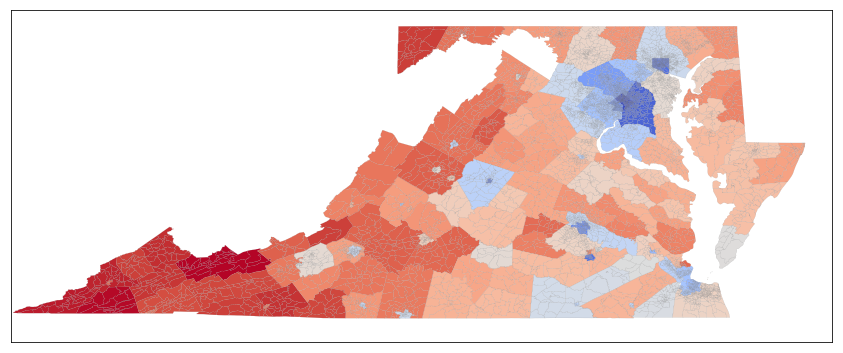

In [91]:
fig, ax = plt.subplots(1, figsize=(12, 5))
ax = merged_gdf.plot(column='trump',
                     cmap='coolwarm', 
                     ax=ax,
                     linewidth=0.1,
                     edgecolor="grey")
ax.set_xlim([-83.7, -74.75])
ax.set_ylim([36.28, 39.9])
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.savefig("images/dmv_map")
plt.show()